In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import copy
import matplotlib.cm as cm
import matplotlib.colors as mcolors

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [2]:
rna_df = pd.read_csv('../../../data/ICGC-LIRI-JP/clean/ICGC-LIRI-JP_rna_tpm_clean_50_include_normal.csv', sep=',', index_col=0, header=0)
rna_df = rna_df.loc[['KLRB1'], :]
rna_df

,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560730,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608,SA560619,SA560621,SA560623,SA560625,SA560627,SA560629,SA560631,SA560633,SA560635,SA560637,SA560639,SA560641,SA560643,SA560645,SA560646,SA560648,SA560650,SA560652,SA560654,SA560656,SA560658,SA560660,SA560662,SA560664,SA560666,SA560669,SA560672,SA560674,SA560676,SA560678,SA560680,SA560682,SA560684,SA560686,SA560688,SA560690,SA560692,SA560694,SA560696,SA560698,SA560703,SA560705,SA560708,SA560710,SA560712,SA560714,SA560718,SA560720,SA560724,SA560726,SA560729,SA560731,SA560732,SA560734,SA560736,SA560738,SA560740,SA560742,SA560960,SA561028,SA570929,SA594209,SA594235,SA594305,SA594317,SA594347,SA594361,SA594375,SA594386,SA594394,SA594398,SA594406,SA594418,SA594436,SA594452,SA594460,SA594473,SA594491,SA594502,SA594512,SA594524,SA594553,SA594561,SA594568,SA594581,SA594593,SA594604,SA594612,SA594631,SA594649,SA594667,SA594686,SA594705,SA594732,SA594744,SA594756,SA594782,SA594789,SA594813,SA595199,SA595207,SA595215,SA595221,SA595226,SA595240,SA595245,SA595254,SA595259,SA595265,SA595284,SA595291,SA595296,SA595305,SA595310,SA595318,SA595327,SA595332,SA595341,SA595350,SA595368,SA595374,SA595380,SA595390,SA595399,SA595408,SA595415,SA595419,SA595423,SA595426,SA595430,SA595435,SA595439,SA595444,SA595448,SA595451,SA595456,SA595459,SA595465,SA595467,SA595469,SA595471,SA595473,SA595476,SA595478,SA595482,SA595484,SA595486,SA595488,SA595490,SA595492,SA595494,SA595496,SA595498,SA595500,SA595502,SA595505,SA595507,SA595509,SA595511,SA595513,SA595515,SA595518,SA595520,SA595523,SA595525,SA595527,SA595529,SA595531,SA595533,SA595536,SA595538,SA595540,SA595542,SA595546,SA595548,SA595550,SA595552,SA595554,SA595556,SA595558,SA595560,SA595562,SA595565,SA595572,SA595575,SA595578,SA595580,SA595582,SA595586,SA595589,SA595601,SA595603,SA595607,SA595611
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [3]:
score_df = pd.read_csv('../../../data/GSVA/ICGC/self-defined_genelist.txt.csv', index_col=0, header=0)
score_df.columns = [x.replace('.', '-') for x in score_df.columns]
score_df

,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608
3-gene exhausted cd8 signature,0.818236,0.769632,-0.642948,-0.702642,-0.902419,0.605955,0.658951,-0.828582,0.859472,-0.554224,-0.722516,0.816226,0.584146,-0.496762,-0.634038,0.590770,-0.750056,-0.472274,-0.628284,0.823223,-0.724358,-0.842799,0.753033,0.922739,0.809155,-0.825530,-0.493205,-0.615110,0.714700,-0.677137,0.621362,-0.574023,0.709267,-0.555867,0.489306,0.952735,0.737477,-0.334872,0.883364,0.622681,0.865128,0.998511,0.870860,0.706438,-0.782434,0.350205,-0.867510,0.647934,0.692743,0.839077,-0.817953,-0.677119,-0.556450,0.888202,-0.615854,0.878067,0.844808,0.714403,0.551116,-0.761295,0.845329,0.740007,-0.790994,-0.778638,-0.533309,0.485076,0.743813,0.619586,-0.828805,-0.720878,-0.312021,-0.783997,0.525791,0.847562,-0.510985,0.912914,0.868776,0.780499,-0.866691,-0.606773,0.405508,-0.637488,-0.810867,-0.747600,-0.603498,-0.679643,-0.789356,-0.689393,-0.415333,-0.732266,0.949535,-0.563900,-0.802159,-0.800893,-0.807815,-0.645553,-0.787123,0.750056,-0.830889,0.683290,0.485062,-0.642752,-0.879271,-0.614773,0.738668,-0.489965,-0.766952,0.805508,-0.575512,-0.921920,-0.580350,-0.767214,0.420320,-0.769557,0.798476,0.385812,0.647041,-0.695827,0.804466,0.427540,0.682918,0.729259,-0.776628,-0.584369,-0.671306,-0.623670,-0.410644,0.605821,-0.572077,-0.879196,0.720670,-0.733978,0.728470,-0.689468,-0.401414,-0.684648,0.384412,0.937700,-0.727652,0.916412,-0.643915,0.684495,0.971492,-0.641682,-0.796130,-0.759434,-0.510979,-0.863714,-0.658653,0.307257,-0.609825,0.892817,-0.641012,0.703687,-0.707108,-0.859546,0.995162,-0.764503,0.472199,0.384197,-0.723667,-0.737626,-0.561221,-0.763603,0.830592,0.725195,0.699469,0.418906,0.385169,-0.613472,-0.788463,0.760608,-0.823624,0.954224,-0.599032,-0.558988,0.681876,0.574991,0.366928,-0.535690,0.813646,-0.489334,-0.311500,0.847711,-0.822702,-0.823372,-0.641608,0.920432,0.680553,0.380573,-0.702642,0.652326,0.264652,-0.682860,0.852177,-0.657048,0.535865,-0.560551,-0.600149

In [4]:
score_df.max().max(), score_df.min().min()

(0.998511350949014, -0.921920357275896)

In [5]:
rna_df = rna_df.loc[:,score_df.columns]
print(rna_df.shape)
rna_df

(1, 230)


,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KLRB1,6.707438,9.248527,1.529315,0.761446,7.541445,0.221932,2.186987,0.437303,4.213309,6.716415,0.323397,2.196727,4.348929,7.806667,1.884988,24.947355,3.810821,8.457058,1.304057,6.655831,2.618691,0.42374,21.71701,8.90973,1.520818,0.17995,0.451454,4.50155,2.686577,2.393004,5.517301,2.798113,1.513318,3.344436,2.092707,7.076795,5.598584,2.454304,8.152473,6.006376,6.043142,7.838848,5.937817,7.48108,0.864124,4.274647,1.037706,4.811164,3.955616,21.584039,4.386707,0.547499,11.807265,2.353606,12.334759,1.025679,1.347566,15.966185,1.158509,2.270926,5.640306,1.506904,2.053703,12.993204,3.95078,1.873358,4.940572,0.662701,2.373505,0.384633,8.437688,2.485398,3.608654,52.789694,5.457025,5.914809,2.150354,8.998691,1.413707,9.865205,6.410253,12.338036,0.281016,4.61888,2.185169,0.883033,2.626138,0.160406,11.015848,1.954703,7.104946,8.83108,1.894611,6.55061,0.957071,2.200366,2.461425,4.650403,2.042464,2.559444,8.608607,7.385323,1.330255,3.850729,1.217709,2.097769,3.922381,5.132685,1.813163,3.453839,2.537205,5.600811,2.796737,0.538798,11.002325,6.392811,20.597759,5.078234,0.933204,6.006759,6.87137,8.552148,0.608812,8.084574,27.146057,9.346782,5.515607,2.373481,6.139185,0.419185,16.005328,6.563437,5.990989,0.851033,0.594291,6.040126,1.84904,2.345625,11.950361,1.134401,6.442503,1.801209,17.298587,1.155566,1.597182,0.500525,1.015571,2.370347,3.004955,10.585481,3.242588,4.356259,0.568703,4.187052,1.488628,0.222735,9.744495,0.328753,15.081808,7.037981,8.520474,3.736482,1.649935,10.395218,5.039512,5.18778,4.719308,1.444393,11.023441,0.557056,1.026257,26.161421,0.331154,22.76868,7.603981,2.342329,16.00164,24.925533,3.893355,3.373814,3.292748,4.466127,0.618355,20.83104,0.450134,0.514089,2.

In [6]:
score_merge_df = pd.concat([rna_df, score_df], axis=0)
score_merge_df.sort_values(by='KLRB1', axis=1, inplace=True)
score_merge_df.index = [score_merge_df.index[0]] + [x for x in score_merge_df.index[1:]]
score_merge_df

,SA594586,SA595301,SA595608,SA594463,SA595308,SA560667,SA594724,SA595413,SA595487,SA561027,SA560681,SA595264,SA594546,SA595510,SA595315,SA560723,SA595512,SA595585,SA560640,SA560659,SA595481,SA594753,SA595454,SA560624,SA595506,SA594397,SA595590,SA594402,SA595587,SA595563,SA595437,SA595446,SA560689,SA560626,SA560665,SA595571,SA561024,SA594269,SA595483,SA595524,SA560673,SA595564,SA560657,SA595581,SA560632,SA560675,SA595195,SA595242,SA560693,SA594297,SA595588,SA594514,SA595475,SA595570,SA595269,SA595549,SA594358,SA595357,SA595294,SA594388,SA595577,SA560701,SA595464,SA595598,SA560721,SA560719,SA570928,SA595545,SA560653,SA595191,SA560728,SA594599,SA560737,SA560713,SA595557,SA595371,SA595204,SA594500,SA595566,SA595530,SA560628,SA594486,SA560644,SA594677,SA560638,SA595573,SA595514,SA595493,SA560651,SA560735,SA560717,SA595384,SA560739,SA595338,SA595537,SA595388,SA594692,SA560697,SA560709,SA594777,SA595257,SA560706,SA595329,SA595516,SA560733,SA595355,SA560655,SA594564,SA595503,SA595600,SA595366,SA595501,SA595584,SA560622,SA594432,SA595458,SA595526,SA595217,SA594821,SA595499,SA560699,SA560636,SA560702,SA595539,SA595534,SA594785,SA594558,SA560642,SA594739,SA594656,SA594223,SA595504,SA595326,SA595519,SA595553,SA560704,SA560711,SA595472,SA595517,SA560695,SA595521,SA594383,SA595468,SA595282,SA595559,SA595224,SA595470,SA560647,SA560972,SA595345,SA595528,SA595386,SA560670,SA594340,SA595574,SA560685,SA595421,SA595428,SA595394,SA560687,SA595462,SA595398,SA595561,SA595405,SA595532,SA595579,SA560691,SA561015,SA560620,SA594647,SA560679,SA595251,SA594458,SA594576,SA595353,SA595441,SA595378,SA594611,SA560671,SA595432,SA594445,SA595491,SA594801,SA595402,SA560663,SA595392,SA594414,SA595236,SA595450,SA560727,SA594792,SA594627,SA595288,SA594507,SA595555,SA595551,SA560661,SA595385,SA594531,SA595466,SA560649,SA595606,SA595547,SA560668,SA560634,SA595477,SA595522,SA560984,SA560715,SA560677,SA560630,SA594368,SA595576,SA595417,SA594313,SA595495,SA595425,SA560725,SA595541,SA560707,SA595508,SA594207,SA595276,SA595489,SA595497,SA595212,SA595485,SA560683,SA595602,SA560741
KLRB1,0.160406,0.179950,0.207194,0.221932,0.222735,0.281016,0.323397,0.328753,0.331154,0.384633,0.419185,0.423740,0.437303,0.450134,0.451454,0.500525,0.514089,0.535491,0.538798,0.547499,0.557056,0.568703,0.594291,0.608812,0.618355,0.662701,0.670029,0.761446,0.786271,0.820013,0.851033,0.864124,0.883033,0.933204,0.957071,0.997978,1.015571,1.025679,1.026257,1.036342,1.037706,1.095536,1.134401,1.140420,1.155566,1.158509,1.217709,1.304057,1.330255,1.347566,1.354061,1.413707,1.444393,1.487946,1.488628,1.492955,1.506904,1.513318,1.520818,1.529315,1.575030,1.597182,1.649935,1.769013,1.801209,1.813163,1.849040,1.853572,1.873358,1.884988,1.894611,1.954703,2.042464,2.053703,2.072163,2.092707,2.097769,2.150354,2.155660,2.176930,2.185169,2.186987,2.196727,2.200366,2.270926,2.284364,2.317357,2.342329,2.345625,2.353606,2.370347,2.373481,2.373505,2.393004,2.398874,2.454304,2.461425,2.485398,2.537205,2.559444,2.618691,2.626138,2.686577,2.775564,2.796737,2.798113,3.004955,3.242588,3.292748,3.324297,3.344436,3.373814,3.429300,3.453839,3.608654,3.736482,3.749358,3.810821,3.850729,3.893355,3.922381,3.950780,3.955616,4.078912,4.158411,4.187052,4.213309,4.274647,4.348929,4.356259,4.386707,4.466127,4.501550,4.584442,4.588557,4.618880,4.650403,4.719308,4.807048,4.811164,4.935951,4.940572,5.039512,5.078234,5.126566,5.132685,5.187780,5.457025,5.515607,5.517301,5.533595,5.598584,5.600811,5.640306,5.690075,5.914809,5.937817,5.990989,6.006376,6.006759,6.040126,6.043142,6.124793,6.139185,6.237477,6.242301,6.392811,6.410253,6.442503,6.550610,6.563437,6.655831,6.707438,6.716415,6.871370,7.037981,7.076795,7.104946,7.385323,7.481080,7.541445,7.603981,7.806667,7.838848,8.084574,8.152473,8.437688,8.457058,8.520474,8.552148,8.608607,8.831080,8.909730,8.998691,9.248527,9.300547,9.346782,9.744495,9.865205,10.395218,10.585481,10.686546,10.767630,11.002325,11.015848,11.023441,11.795039,11.807265,11.950361,12.334759,12.338036,12.993204,13

In [7]:
# def str_insert(str_origin, pos, str_add):
#     str_list = list(str_origin)    # 字符串转list
#     str_list.insert(pos, str_add)  # 在指定位置插入字符串
#     str_out = ''.join(str_list)    # 空字符连接
#     return  str_out

# score_merge_df.index = [x if len(x) < 40 else str_insert(x, 36, '\n')  for x in score_merge_df.index]

In [8]:
if not os.path.exists('../../../data/GSVA_plot'):
    os.makedirs('../../../data/GSVA_plot')

score_merge_df.to_csv('../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_all_score2.csv')

In [9]:
corr_df = pd.read_csv('../../../data/GSVA/ICGC/self-defined_genelist.txt_corr.csv', index_col=0, header=0)
corr_df = corr_df.loc[score_df.index, :]
corr_df.columns = [x.replace('.', '_') for x in corr_df.columns]
corr_df['-log10(P)'] = -np.log10(corr_df['pvalue'])
corr_df.to_csv('../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_all_corr2.csv')
corr_df

,cor,pvalue,-log10(P)
3-gene exhausted cd8 signature,0.354016,3.400768e-08,7.468423
9-gene exhausted cd8 signature,0.492745,1.796116e-15,14.745666
cabrita tls signature,0.491024,2.324663e-15,14.633640
cytolytic activity signature,0.618183,1.227550e-25,24.910961
gajewski 13-gene inflammatory signature,0.554688,5.880301e-20,19.230600
kaufman 18-gene t cell inflammed signature,0.596260,1.559987e-23,22.806879
merk 6-gene interferon gamma signature,0.452270,5.370558e-13,12.269981
nanostring apc signature,0.575674,1.065353e-21,20.972506
nanostring interferon gamma signature,0.491033,2.321583e-15,14.634216
nanostring t-cell exhausted signature,0.537358,1.312228e-18,17.881991


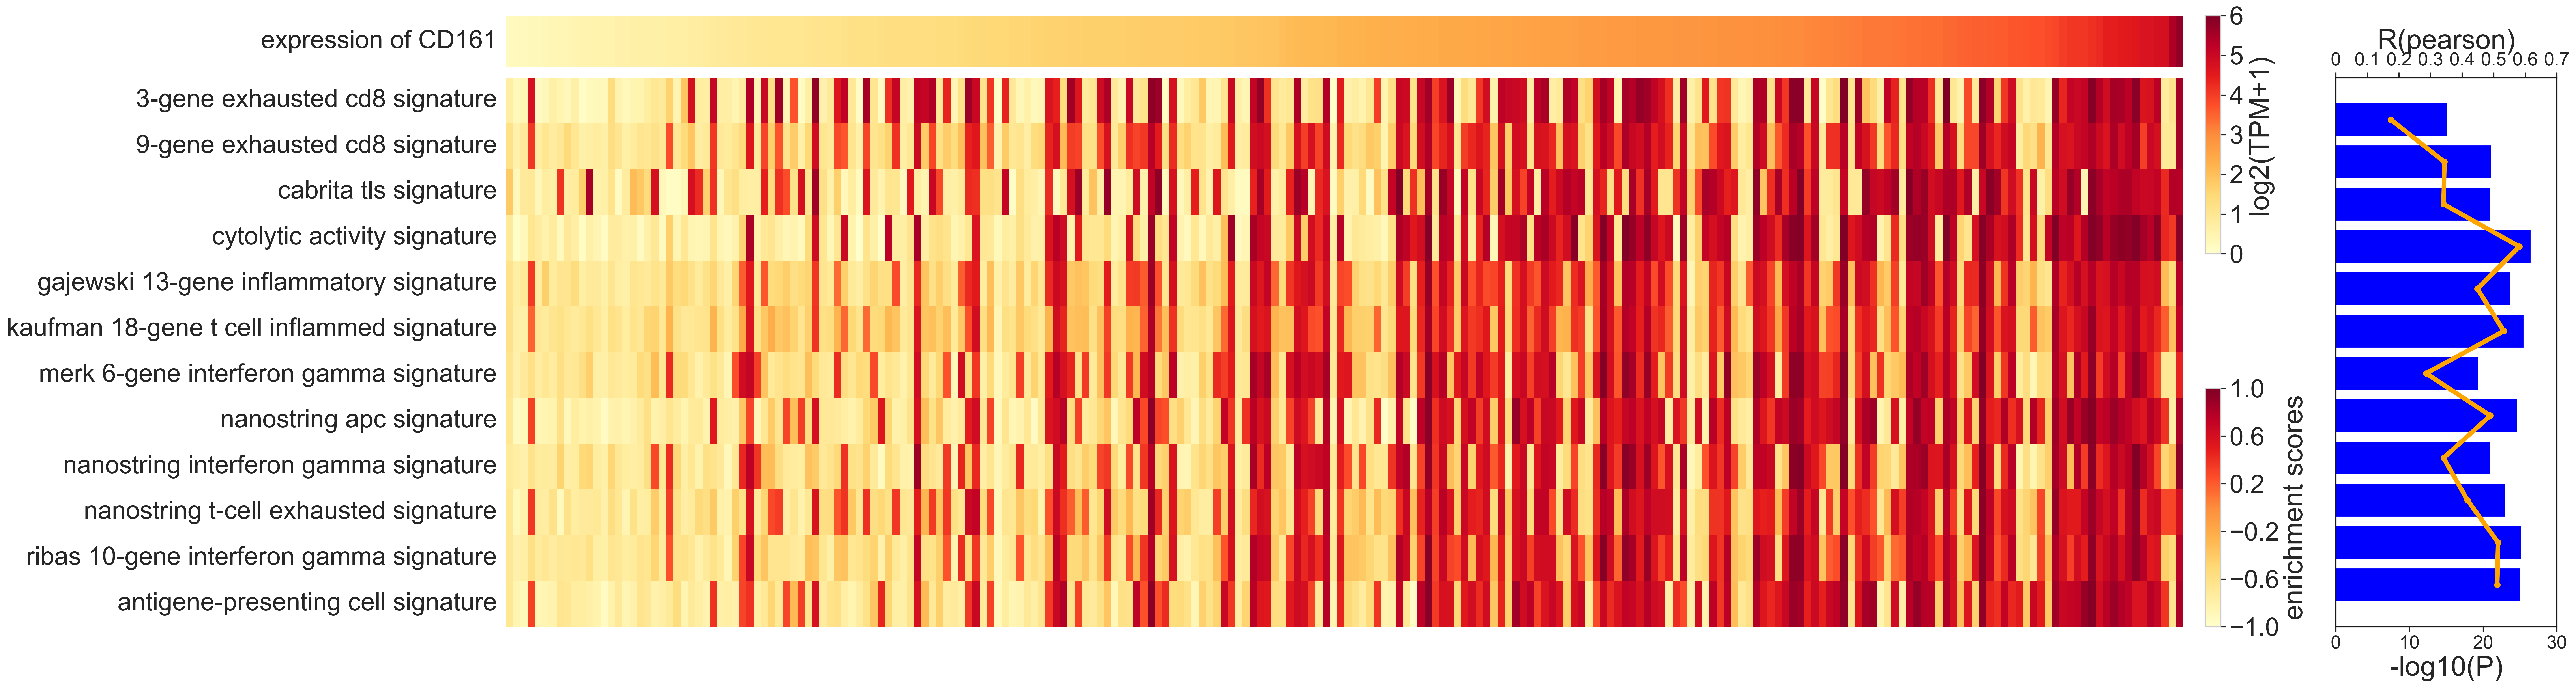

In [10]:
fig = plt.figure(figsize=(40, 12), dpi=300)

grid = plt.GridSpec(10,110)
sns.set_theme(style="whitegrid",font_scale=2.5)

# CD161
plt.subplot(grid[0,:90])
# sns.heatmap(score_merge_df.iloc[0:1, :], cmap='coolwarm', xticklabels='', yticklabels='',center=4, vmin=0, vmax=10)
h1 = sns.heatmap(np.log2(score_merge_df.iloc[0:1, :] + 1), cmap='YlOrRd', xticklabels='', yticklabels=['expression of CD161'], vmin=0, vmax=6, cbar=False)
plt.yticks(rotation=0)

axc1 = plt.subplot(grid[:4,91])
cmap1 = copy.copy(cm.YlOrRd)
norm1 = mcolors.Normalize(vmin=0, vmax=6)
im1 = cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = fig.colorbar(
    im1, cax=axc1, orientation='vertical',
    ticks=np.linspace(0, 6, 7),
    label='log2(TPM+1)'
)
axc1.grid(False)

# enrichment scores
plt.subplot(grid[1:10,:90])
# sns.heatmap(score_merge_df.iloc[1:, :], cmap='coolwarm', xticklabels='', yticklabels=[x[5:] for x in score_merge_df.index[1:]])
h2 = sns.heatmap(score_merge_df.iloc[1:, :], cmap='YlOrRd', xticklabels='', yticklabels=score_merge_df.index[1:], cbar=False)

axc2 = plt.subplot(grid[6:,91])
cmap2 = copy.copy(cm.YlOrRd)
norm2 = mcolors.Normalize(vmin=-1, vmax=1)
im2 = cm.ScalarMappable(norm=norm2, cmap=cmap2)
cbar2 = fig.colorbar(
    im2, cax=axc2, orientation='vertical',
    ticks=np.linspace(-1, 1, 6),
    label='enrichment scores'
)
axc2.grid(False)

# pearson
ax1 = plt.subplot(grid[1:10, 98:], label="1")
ax1.barh(range(corr_df.shape[0], 0, -1), width=corr_df['cor'], color='blue')
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax1.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7], fontdict={'fontsize':20})
ax1.set_xlim(0, 0.7)
ax1.set_yticks([])
ax1.spines['top'].set_color('k')
ax1.spines['bottom'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)')
ax1.xaxis.set_label_position('top')
ax1.grid(False)

# -log10(P)
ax2 = fig.add_subplot(grid[1:10, 98:], label="2", frame_on=False, sharey=ax1)
ax2.plot(corr_df['-log10(P)'], range(corr_df.shape[0], 0, -1), 'o-', color='orange', lw=5)
# ax2.spines['left'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xticks(range(0, 40, 10))
ax2.set_xticklabels(range(0, 40, 10), fontdict={'fontsize':20})
ax2.set_yticks([])
ax2.set_xlabel('-log10(P)')
ax2.grid(False)

# fig.tight_layout()  # 自动紧凑布局
plt.savefig("../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_plot2.pdf", bbox_inches = 'tight')
plt.savefig("../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_plot2.png", dpi=300, bbox_inches = 'tight')
plt.show()